<a href="https://colab.research.google.com/github/Predic-learning/AI/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

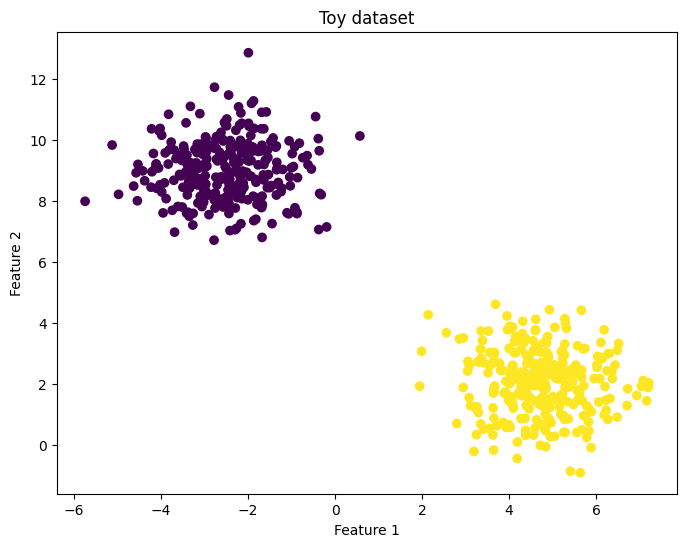

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_features, data_targets = make_blobs(n_samples=600,
                                         centers=2, n_features=2,
                                         random_state=42)

# The function outputs targets 0 and 1 so we need to convert targets 0 to -1
transformed_data_targets = [-1 if t == 0 else +1 for t in data_targets]

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data_features[:, 0], data_features[:, 1], c = transformed_data_targets)
plt.title("Toy dataset")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.show()

# Split data into training and test set
features_train, features_test, labels_train, labels_test = train_test_split(data_features,
                                                                              transformed_data_targets,
                                                                              test_size = 0.3)

In [ ]:
import numpy as np
from sklearn.utils import shuffle

class LinearSVM:

    def __init__(self, regularization_param):
        """
        Initialize the model by setting the regularization parameter
        and a boolean variable for our trained weights.
        """
        self.regularization_param = regularization_param
        self.trained_weights = None

    def add_bias_term(self, features):
        """
        Add intercept 1 to each training example for bias b
        """
        n_samples = features.shape[0]
        ones = np.ones((n_samples, 1))
        return np.concatenate((ones, features), axis=1)

    def compute_cost(self, weights, features, labels) -> float:
        """
        Compute the value of the cost function
        """
        n_samples = features.shape[0]

        # Compute hinge loss
        predictions = np.dot(features, weights).flatten()
        distances = 1 - labels * predictions
        hinge_losses = np.maximum(0, distances)

        # Compute sum of the individual hinge losses
        sum_hinge_loss = np.sum(hinge_losses) / n_samples
        # Compute entire cost
        cost = (1 / 2) * np.dot(weights.T, weights) + self.regularization_param * sum_hinge_loss

        return float(cost)

    def compute_gradient(self, weights, features, labels) -> np.ndarray:
        """
        Compute the gradient, needed for training
        """
        predictions = np.dot(features, weights)
        distances = 1 - labels * predictions
        n_samples, n_feat = features.shape
        sub_gradients = np.zeros((1, n_feat))

        for idx, dist in enumerate(distances):
            if max(0, dist) == 0:
                sub_gradients += weights.T
            else:
                sub_grad = weights.T - (self.regularization_param * features[idx] * labels[idx])
                sub_gradients += sub_grad

        # Sum up and divide by the number of samples
        avg_gradient = sum(sub_gradients) / len(labels)

        return avg_gradient

    def train(self, train_features, train_labels, n_epochs, learning_rate=0.01, batch_size=1):
        """
        Train the model with stochastic gradient descent using the
        specified number of epochs, learning rate and batch size.
        """
        # Add bias term to features
        train_features = self.add_bias_term(train_features)

        # Initalize weight vector
        n_samples, n_feat = train_features.shape
        weights = np.zeros(n_feat)[:, np.newaxis]

        # Train the model for a certain number of epochs
        for epoch in range(n_epochs):
            features, labels = shuffle(train_features, train_labels)
            features, labels = train_features, train_labels
            start, end = 0, batch_size
            while end <= len(labels): # Training loop over the dataset
                batch = features[start:end]
                batch_labels = labels[start:end]

                grad = self.compute_gradient(weights, batch, batch_labels)
                update = (learning_rate * grad)[:, np.newaxis]
                weights = weights - update
                start, end = end, end + batch_size

            current_cost = self.compute_cost(weights, features, labels)
            print(f"Epoch {epoch + 1}, cost: {current_cost}")

        # Set the trained weights to allow making predictions
        self.trained_weights = weights

    def predict(self, test_features) -> np.ndarray:
        """
        Predict labels for new test features.
        Raises ValueError if model has not been trained yet.
        """
        test_features = self.add_bias_term(test_features)
        if self.trained_weights is None:
            raise ValueError("You haven't trained the SVM yet!")

        predicted_labels = []
        n_samples = test_features.shape[0]
        for idx in range(n_samples):
            prediction = np.sign(np.dot(self.trained_weights.T, test_features[idx]))
            predicted_labels.append(prediction)

        return np.array(predicted_labels)

In [ ]:
# Compute some values to make sure the cost is computed correctly
# I calculated the values for this example by hand first
svm = LinearSVM(regularization_param=1)
weights = np.array([1, 2])[:, np.newaxis]
features = np.array([[0.5], [2.5]])
new_features = svm.add_bias_term(features)

labels = np.array([-1, +1])
assert svm.compute_cost(weights, new_features, labels) == 4.
gradient = svm.compute_gradient(weights, new_features, labels[:, np.newaxis])

In [ ]:
# Initialize a new SVM and train it on the given toy dataset
regularization_param = 100
lr = 0.000001
svm = LinearSVM(regularization_param)
trained_weights = svm.train(features_train, labels_train, n_epochs=10, learning_rate=lr)

Epoch 1, cost: 27.894435221576828
Epoch 2, cost: 7.7118291461356865
Epoch 3, cost: 3.309695083814264
Epoch 4, cost: 2.270994334573311
Epoch 5, cost: 1.861622609697217
Epoch 6, cost: 1.6014729796471432
Epoch 7, cost: 1.4332831172882972
Epoch 8, cost: 1.3003888235474166
Epoch 9, cost: 1.180274967228682
Epoch 10, cost: 1.08793871875955


In [ ]:
# Predict lables for unknown test samples
from sklearn.metrics import accuracy_score, recall_score, precision_score

predicted_labels = svm.predict(features_test)
predicted_labels = predicted_labels.flatten()

print("Accuracy on test dataset: {}".format(accuracy_score(labels_test, predicted_labels)))
print("Recall on test dataset: {}".format(recall_score(labels_test, predicted_labels)))
print("Precision on test dataset: {}".format(precision_score(labels_test, predicted_labels)))

Accuracy on test dataset: 1.0
Recall on test dataset: 1.0
Precision on test dataset: 1.0


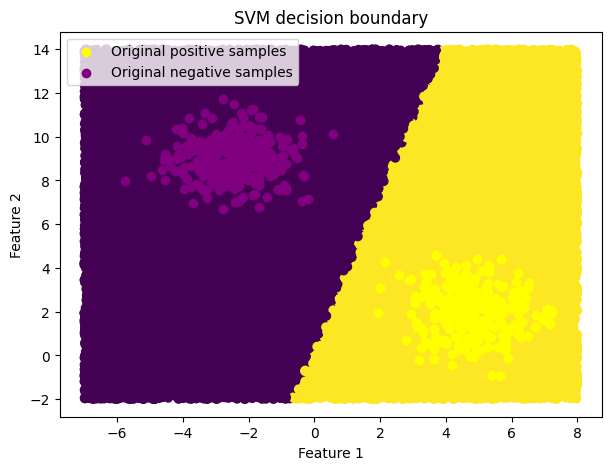

In [ ]:
import numpy as np

# Create dataset for visualization
size=40000
feat_1 = np.random.uniform(low=-7, high=8, size=size)
feat_2 = np.random.uniform(low=-2, high=14, size=size)
features_vis = np.column_stack((feat_1, feat_2))

labels_vis = svm.predict(features_vis)

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.scatter(features_vis[:, 0], features_vis[:, 1], c = labels_vis)
# Plot original dataset
positive_samples = [idx for idx in range(len(transformed_data_targets)) if transformed_data_targets[idx] == +1]
negative_samples = [idx for idx in range(len(transformed_data_targets)) if transformed_data_targets[idx] == -1]
plt.scatter(data_features[positive_samples, 0],
            data_features[positive_samples, 1],
            c="yellow", label="Original positive samples")
plt.scatter(data_features[negative_samples, 0],
            data_features[negative_samples, 1],
            c="purple", label="Original negative samples")
plt.title("SVM decision boundary")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.legend(loc=2)
plt.show()

Accuracy: 1.0


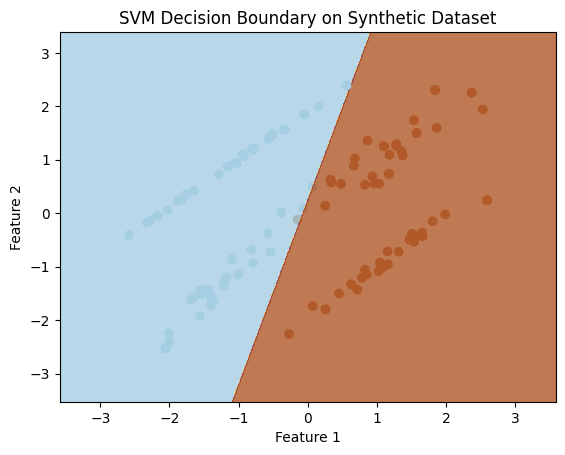

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Create a mesh grid for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary on Synthetic Dataset')
plt.show()


In [ ]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary on Synthetic Dataset')
plt.show()


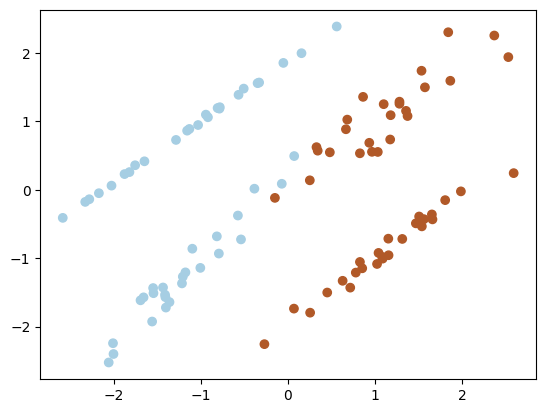

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

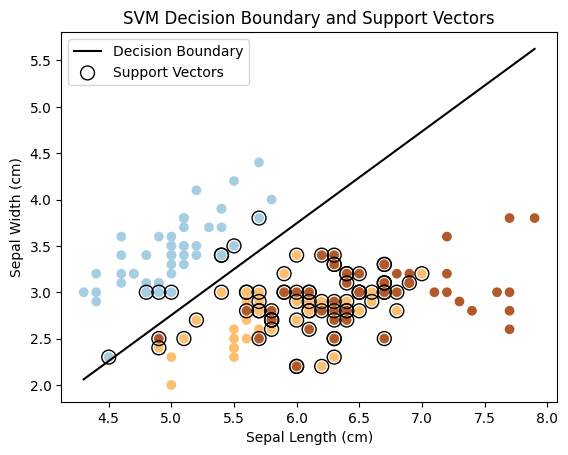

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load the Iris dataset for simplicity
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Get the coefficients of the hyperplane (weights)
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

# Find the slope and intercept of the hyperplane (line)
slope = -w[0] / w[1]
intercept = -b / w[1]

# Create a range of x values for the line
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate the corresponding y values using the equation of a line
y_line = slope * x_line + intercept

# Scatter plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary (hyperplane)
plt.plot(x_line, y_line, 'k-', label='Decision Boundary')

# Highlight the support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('SVM Decision Boundary and Support Vectors')
plt.show()
